In [6]:
pip install palmerpenguins

In [7]:
from palmerpenguins import load_penguins
import pandas as pd


In [8]:
penguins = load_penguins()
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [9]:
penguins = penguins[
    (penguins['species'] == 'Adelie') |
    (penguins['species'] == 'Gentoo')
]

In [10]:
penguins.shape

(276, 8)

In [11]:
penguins.isna().sum()

,0
species,0
island,0
bill_length_mm,2
bill_depth_mm,2
flipper_length_mm,2
body_mass_g,2
sex,11
year,0


In [12]:
penguins.dropna(inplace=True)

<ipython-input-12-c2eb3adc38c2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  penguins.dropna(inplace=True)


In [13]:
penguins.shape

(265, 8)

In [14]:
penguins = pd.get_dummies(
    penguins,
    columns=['island', 'sex'],
    drop_first=True
)

In [15]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler


In [16]:
target_encoder = LabelEncoder()
penguins['species'] = target_encoder.fit_transform(penguins['species'])

In [17]:
penguins.head()

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year,island_Dream,island_Torgersen,sex_male
0,0,39.1,18.7,181.0,3750.0,2007,False,True,True
1,0,39.5,17.4,186.0,3800.0,2007,False,True,False
2,0,40.3,18.0,195.0,3250.0,2007,False,True,False
4,0,36.7,19.3,193.0,3450.0,2007,False,True,False
5,0,39.3,20.6,190.0,3650.0,2007,False,True,True


In [18]:
X = penguins.drop('species', axis=1)
y = penguins['species']

In [19]:
from sklearn.model_selection import train_test_split


In [20]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (212, 8)
X_test shape: (53, 8)
y_train shape: (212,)
y_test shape: (53,)


In [21]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [22]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# 5. Make predictions on both TRAIN and TEST sets
y_train_pred = gnb.predict(X_train)
y_test_pred = gnb.predict(X_test)

# 6. Evaluate on the TRAINING set
train_accuracy = accuracy_score(y_train, y_train_pred)
train_cm = confusion_matrix(y_train, y_train_pred)
train_report = classification_report(y_train, y_train_pred)

print("**Training set results**")
print("Accuracy:", train_accuracy)
print("Confusion Matrix:\n", train_cm)
print("Classification Report:\n", train_report)

# 7. Evaluate on the TEST set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_cm = confusion_matrix(y_test, y_test_pred)
test_report = classification_report(y_test, y_test_pred)

print("**Testing set results**")
print("Accuracy:", test_accuracy)
print("Confusion Matrix:\n", test_cm)
print("Classification Report:\n", test_report)

**Training set results**
Accuracy: 1.0
Confusion Matrix:
 [[113   0]
 [  0  99]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       113
           1       1.00      1.00      1.00        99

    accuracy                           1.00       212
   macro avg       1.00      1.00      1.00       212
weighted avg       1.00      1.00      1.00       212

**Testing set results**
Accuracy: 1.0
Confusion Matrix:
 [[33  0]
 [ 0 20]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        20

    accuracy                           1.00        53
   macro avg       1.00      1.00      1.00        53
weighted avg       1.00      1.00      1.00        53



In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
log_reg = LogisticRegression(max_iter=200)
log_reg.fit(X_train, y_train)

# 5. Predict on both training and testing sets
y_train_pred = log_reg.predict(X_train)
y_test_pred = log_reg.predict(X_test)

# 6. Evaluate on training data
train_accuracy = accuracy_score(y_train, y_train_pred)
train_cm = confusion_matrix(y_train, y_train_pred)
train_report = classification_report(y_train, y_train_pred)

print("**Training set results**")
print("Accuracy:", train_accuracy)
print("Confusion Matrix:\n", train_cm)
print("Classification Report:\n", train_report)

# 7. Evaluate on testing data
test_accuracy = accuracy_score(y_test, y_test_pred)
test_cm = confusion_matrix(y_test, y_test_pred)
test_report = classification_report(y_test, y_test_pred)

print("**Testing set results**")
print("Accuracy:", test_accuracy)
print("Confusion Matrix:\n", test_cm)
print("Classification Report:\n", test_report)

**Training set results**
Accuracy: 1.0
Confusion Matrix:
 [[113   0]
 [  0  99]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       113
           1       1.00      1.00      1.00        99

    accuracy                           1.00       212
   macro avg       1.00      1.00      1.00       212
weighted avg       1.00      1.00      1.00       212

**Testing set results**
Accuracy: 1.0
Confusion Matrix:
 [[33  0]
 [ 0 20]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        20

    accuracy                           1.00        53
   macro avg       1.00      1.00      1.00        53
weighted avg       1.00      1.00      1.00        53



**Naive Bayes Results:**
The Naive Bayes model performed exceptionally well on both the training and testing datasets. On the training set, it achieved an accuracy of 1.0, meaning all the predictions were correct. The confusion matrix showed that all 113 Adelie and 99 Gentoo samples were classified accurately, with no errors. Similarly, the model achieved 100% accuracy on the test data, correctly predicting all 33 Adelie and 20 Gentoo samples. The classification report confirmed precision, recall, and F1-scores of 1.0 for both species, highlighting the model's flawless performance.

**Logistic Regression Results:**
Logistic Regression also showed perfect results on both datasets. On the training data, it achieved an accuracy of 1.0, with every sample classified correctly. The confusion matrix reflected no misclassifications for both Adelie and Gentoo species, consistent with the Naive Bayes results. On the testing set, the model again achieved 100% accuracy, with all predictions for the 33 Adelie and 20 Gentoo samples being accurate. Precision, recall, and F1-scores were 1.0 for both species, indicating no room for error in the model's performance.

**Comparison and Findings:**
Both Naive Bayes and Logistic Regression produced identical results with perfect accuracy on this dataset. This suggests that the features used for classification are likely well-separated for these two species, making it easy for both models to distinguish between them. While the results here are impressive, in more complex or noisy datasets, the differences in how Naive Bayes and Logistic Regression handle data might become more noticeable. For this task, however, either model would be an excellent choice for classification.

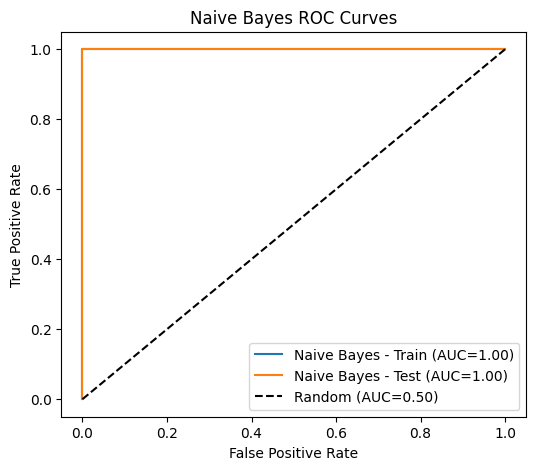

In [30]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# -------------------------------------------------------
# 1) Naive Bayes - Train vs Test ROC Plot
# -------------------------------------------------------
plt.figure(figsize=(6, 5))
fpr_gnb_train, tpr_gnb_train, _ = roc_curve(y_train, gnb.predict_proba(X_train)[:, 1])
fpr_gnb_test, tpr_gnb_test, _   = roc_curve(y_test, gnb.predict_proba(X_test)[:, 1])

gnb_train_auc = roc_auc_score(y_train, gnb.predict_proba(X_train)[:, 1])
gnb_test_auc  = roc_auc_score(y_test, gnb.predict_proba(X_test)[:, 1])

plt.plot(fpr_gnb_train, tpr_gnb_train, label=f"Naive Bayes - Train (AUC={gnb_train_auc:.2f})")
plt.plot(fpr_gnb_test,  tpr_gnb_test,  label=f"Naive Bayes - Test (AUC={gnb_test_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--', label="Random (AUC=0.50)")
plt.title("Naive Bayes ROC Curves")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()


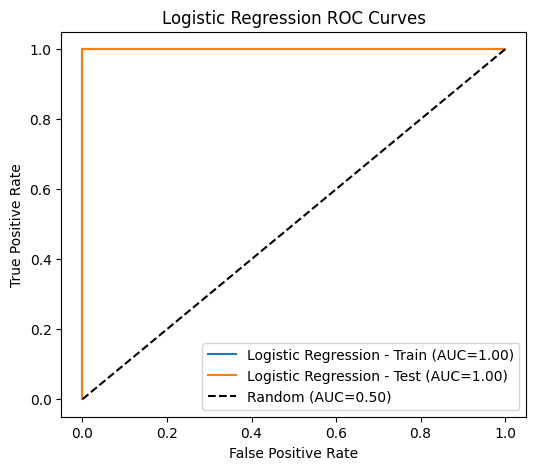

In [31]:

# -------------------------------------------------------
# 2) Logistic Regression - Train vs Test ROC Plot
# -------------------------------------------------------
plt.figure(figsize=(6, 5))
fpr_lr_train, tpr_lr_train, _ = roc_curve(y_train, log_reg.predict_proba(X_train)[:, 1])
fpr_lr_test, tpr_lr_test, _   = roc_curve(y_test, log_reg.predict_proba(X_test)[:, 1])

lr_train_auc = roc_auc_score(y_train, log_reg.predict_proba(X_train)[:, 1])
lr_test_auc  = roc_auc_score(y_test, log_reg.predict_proba(X_test)[:, 1])

plt.plot(fpr_lr_train, tpr_lr_train, label=f"Logistic Regression - Train (AUC={lr_train_auc:.2f})")
plt.plot(fpr_lr_test,  tpr_lr_test,  label=f"Logistic Regression - Test (AUC={lr_test_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--', label="Random (AUC=0.50)")
plt.title("Logistic Regression ROC Curves")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()


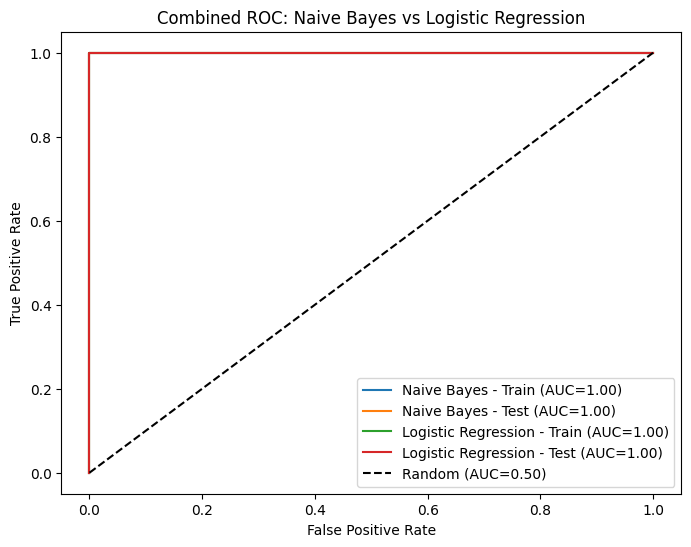

In [32]:

# -------------------------------------------------------
# 3) Combined Plot for Both Models (Train + Test)
# -------------------------------------------------------
plt.figure(figsize=(8, 6))

# Naive Bayes
plt.plot(fpr_gnb_train, tpr_gnb_train,
         label=f"Naive Bayes - Train (AUC={gnb_train_auc:.2f})")
plt.plot(fpr_gnb_test,  tpr_gnb_test,
         label=f"Naive Bayes - Test (AUC={gnb_test_auc:.2f})")

# Logistic Regression
plt.plot(fpr_lr_train, tpr_lr_train,
         label=f"Logistic Regression - Train (AUC={lr_train_auc:.2f})")
plt.plot(fpr_lr_test,  tpr_lr_test,
         label=f"Logistic Regression - Test (AUC={lr_test_auc:.2f})")

# Random baseline
plt.plot([0, 1], [0, 1], 'k--', label="Random (AUC=0.50)")

plt.title("Combined ROC: Naive Bayes vs Logistic Regression")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()


**AUC (Area Under the ROC Curve) Comparison**

I generated the ROC curves for both Naive Bayes and Logistic Regression on the training and test sets. From these plots, the AUC for both models turned out to be 1.0 for both datasets. This means each model perfectly ranks the two species—no Adelie sample is assigned a higher probability of being Gentoo than any actual Gentoo sample, and vice versa.

**Interpretation**

In simpler terms, an AUC of 1.0 indicates there’s a complete separation between Adelie and Gentoo based on the features we used. Since both Naive Bayes and Logistic Regression hit the exact same AUC on training and test data, they are equally strong in distinguishing the two species for this particular dataset.

**Insights**

Usually, achieving a perfect AUC on both sets is quite rare, so it likely means our features (like bill length, flipper length, etc.) are highly distinct between Adelie and Gentoo. Under more complex or overlapping conditions, you’d expect some difference in how each model handles the classification, but here they’re both 100% accurate in terms of ranking and discrimination. Hence, based on the AUC metric alone, neither model outperforms the other—they’re both flawless for this task.

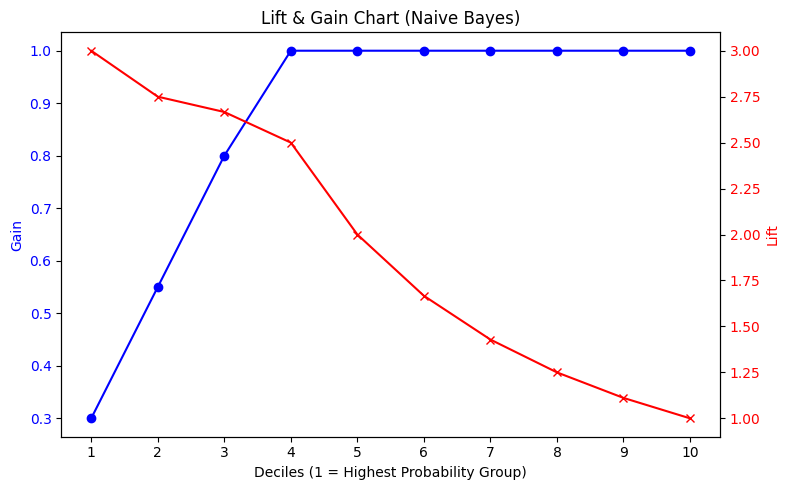

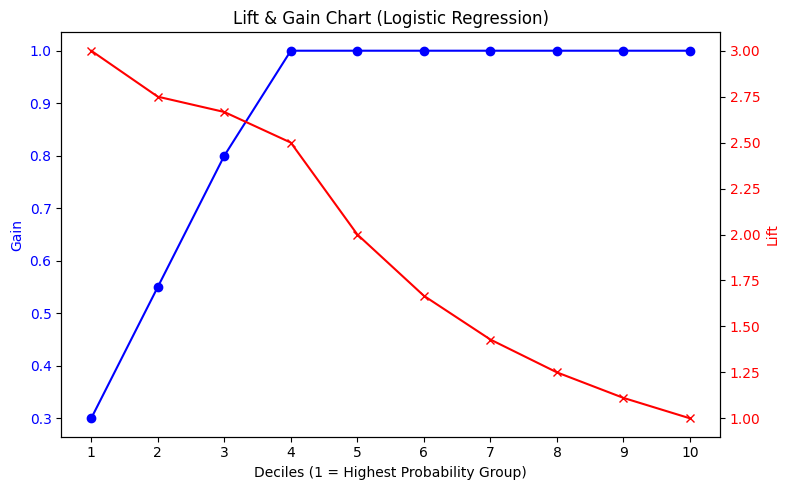

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def plot_lift_gain_chart(model_name, y_true, y_proba, n_bins=10):
    """
    Calculates and plots the Gain and Lift charts using n_bins deciles for a given model.
    """
    # 1. Create a DataFrame with true labels and probabilities
    df = pd.DataFrame({
        'true_label': y_true,
        'pred_proba': y_proba
    })

    # 2. Sort by predicted probability in descending order
    df.sort_values('pred_proba', ascending=False, inplace=True)

    # 3. Split into deciles
    df['decile'] = pd.qcut(df['pred_proba'], q=n_bins, labels=False, duplicates='drop')
    # By default, qcut assigns the lowest values to decile 0 and highest to decile n_bins-1,
    # but we want the highest probs in the 1st decile if we’re conceptually saying “top decile”.
    # We'll invert the labels so 0 means highest probability segment and 9 means lowest.
    df['decile'] = n_bins - 1 - df['decile']

    # 4. Group by decile
    grouped = df.groupby('decile')

    # 5. Calculate cumulative metrics
    total_positives = df['true_label'].sum()  # total count of positives
    lift_gain_data = []

    cum_positive = 0
    cum_count = 0

    # We want to go decile by decile from top to bottom (decile 0 to 9)
    for decile in sorted(grouped.groups.keys()):
        group_df = grouped.get_group(decile)

        # Number of positives in this decile
        positives_in_decile = group_df['true_label'].sum()
        count_in_decile = len(group_df)

        # Add to cumulative counts
        cum_positive += positives_in_decile
        cum_count += count_in_decile

        # Calculate Gains = (cumulative positives) / (total positives)
        gain = cum_positive / total_positives

        # Random expected fraction of data at this decile step
        # For example, at decile 1 (top 10% of the data), we expect 10% of positives randomly.
        # So decile_index + 1 => portion_of_data = (decile_index + 1) / n_bins
        decile_idx = decile
        portion_of_data = (decile_idx + 1) / n_bins

        # Lift = Gains / random portion
        # (But note we track Gains cumulatively while portion_of_data is also cumulative)
        lift = gain / portion_of_data if portion_of_data > 0 else 0

        lift_gain_data.append({
            'decile': decile_idx + 1,  # 1-based labeling
            'gain': gain,
            'lift': lift
        })

    lift_gain_df = pd.DataFrame(lift_gain_data)

    # 6. Plot the data with dual y-axes
    fig, ax1 = plt.subplots(figsize=(8, 5))

    # Plot Gain on the left y-axis
    ax1.set_title(f"Lift & Gain Chart ({model_name})")
    ax1.set_xlabel("Deciles (1 = Highest Probability Group)")
    ax1.set_ylabel("Gain", color='blue')
    ax1.plot(lift_gain_df['decile'], lift_gain_df['gain'], marker='o', color='blue', label='Gain')
    ax1.tick_params(axis='y', labelcolor='blue')

    # Create a twin y-axis for Lift
    ax2 = ax1.twinx()
    ax2.set_ylabel('Lift', color='red')
    ax2.plot(lift_gain_df['decile'], lift_gain_df['lift'], marker='x', color='red', label='Lift')
    ax2.tick_params(axis='y', labelcolor='red')

    # Adjust x-axis to show integer decile labels
    plt.xticks(range(1, n_bins + 1))

    fig.tight_layout()
    plt.show()


# Generate the Lift & Gain Charts using the test set
# Make sure you have gnb_test_proba, log_reg_test_proba, and y_test from your earlier steps.

plot_lift_gain_chart("Naive Bayes", y_test, gnb_test_proba, n_bins=10)
plot_lift_gain_chart("Logistic Regression", y_test, log_reg_test_proba, n_bins=10)


**Lift and Gain Highlights**

The Lift & Gain charts for Naive Bayes and Logistic Regression look almost the same. By the first few deciles, both models capture nearly all Gentoo samples, so the Gain quickly jumps to 1.0 (100%). That means these models are really good at ranking Gentoo at the top.

**Interpreting Lift**

At Decile 1, the Lift is about 3.0, meaning we find three times more Gentoo samples than picking randomly. By around Decile 3 or 4, we’ve already snagged all the positives, so the Lift slides down toward 1.0. This drop-off is normal once we reach into lower-ranked probabilities. Essentially, both models do a great job at prioritizing Gentoo right.


**Model Performance Comparison**

From all the metrics—accuracy, AUC, and Lift/Gain—it’s clear there’s virtually no difference between Naive Bayes and Logistic Regression. Both models score 100% accuracy on train and test, show a perfect AUC of 1.0, and their Lift/Gain charts look nearly the same.

**Which Model Performs Better?**

For this dataset, neither model outperforms the other. They both handle the Adelie vs. Gentoo classification flawlessly. The reason likely lies in the data itself—these two species are so distinct in terms of features like bill dimensions and flipper lengths that even fundamentally different algorithms classify them perfectly. Normally, you’d see differences in trickier datasets where species or classes overlap more, but here, the models end up in a tie.

**Extending to a Complex Dataset**

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report,
    roc_auc_score, roc_curve
)

# Fetch the MNIST dataset (70,000 samples of 28x28 grayscale images)
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist.data, mnist.target  # X is (70000, 784), y is '0'...'9'

# Convert labels to int
y = y.astype(int)


In [44]:
# Binary target: 1 if digit is 8, else 0
y_bin = (y == 8).astype(int)

# Standard Scaling (just like in Penguins)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [45]:
# Manually partition: first 60k is train, last 10k is test
X_train, X_test = X_scaled[:60000], X_scaled[60000:]
y_train, y_test = y_bin[:60000], y_bin[60000:]

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_train shape: (60000, 784)
y_train shape: (60000,)
X_test shape: (10000, 784)
y_test shape: (10000,)


In [46]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)


GaussianNB()

In [47]:
y_train_pred_nb = gnb.predict(X_train)
y_test_pred_nb  = gnb.predict(X_test)

# Accuracy
train_accuracy_nb = accuracy_score(y_train, y_train_pred_nb)
test_accuracy_nb  = accuracy_score(y_test,  y_test_pred_nb)

print("**Naive Bayes - Training set results**")
print("Accuracy:", train_accuracy_nb)
print("Confusion Matrix:\n", confusion_matrix(y_train, y_train_pred_nb))
print("Classification Report:\n", classification_report(y_train, y_train_pred_nb))

print("\n**Naive Bayes - Testing set results**")
print("Accuracy:", test_accuracy_nb)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred_nb))
print("Classification Report:\n", classification_report(y_test, y_test_pred_nb))


**Naive Bayes - Training set results**
Accuracy: 0.3196833333333333
Confusion Matrix:
 [[13378 40771]
 [   48  5803]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.25      0.40     54149
           1       0.12      0.99      0.22      5851

    accuracy                           0.32     60000
   macro avg       0.56      0.62      0.31     60000
weighted avg       0.91      0.32      0.38     60000


**Naive Bayes - Testing set results**
Accuracy: 0.3117
Confusion Matrix:
 [[2151 6875]
 [   8  966]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.24      0.38      9026
           1       0.12      0.99      0.22       974

    accuracy                           0.31     10000
   macro avg       0.56      0.62      0.30     10000
weighted avg       0.91      0.31      0.37     10000




**Naive Bayes AUC**
Training AUC: 0.6201893015663159
Testing AUC: 0.6154732779726921


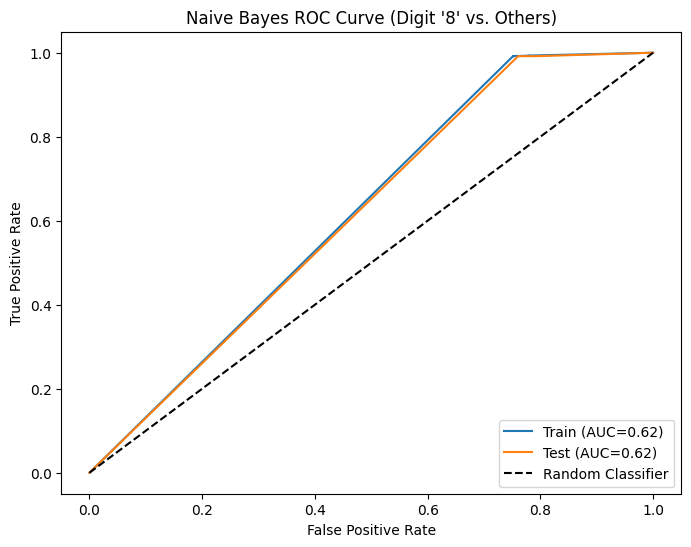

In [48]:
# Predict probabilities for AUC
train_proba_nb = gnb.predict_proba(X_train)[:, 1]
test_proba_nb  = gnb.predict_proba(X_test)[:, 1]

train_auc_nb = roc_auc_score(y_train, train_proba_nb)
test_auc_nb  = roc_auc_score(y_test,  test_proba_nb)

print("\n**Naive Bayes AUC**")
print("Training AUC:", train_auc_nb)
print("Testing AUC:",  test_auc_nb)

# Plot ROC (Train vs Test) separately for Naive Bayes
fpr_nb_train, tpr_nb_train, _ = roc_curve(y_train, train_proba_nb)
fpr_nb_test, tpr_nb_test, _   = roc_curve(y_test,  test_proba_nb)

plt.figure(figsize=(8, 6))
plt.plot(fpr_nb_train, tpr_nb_train, label=f"Train (AUC={train_auc_nb:.2f})")
plt.plot(fpr_nb_test,  tpr_nb_test,  label=f"Test (AUC={test_auc_nb:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random Classifier")
plt.title("Naive Bayes ROC Curve (Digit '8' vs. Others)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()


In [49]:
log_reg = LogisticRegression(max_iter=200, solver='saga')  # 'saga' for large-scale data
log_reg.fit(X_train, y_train)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(max_iter=200, solver='saga')

In [50]:
y_train_pred_lr = log_reg.predict(X_train)
y_test_pred_lr  = log_reg.predict(X_test)

# Accuracy
train_accuracy_lr = accuracy_score(y_train, y_train_pred_lr)
test_accuracy_lr  = accuracy_score(y_test,  y_test_pred_lr)

print("\n**Logistic Regression - Training set results**")
print("Accuracy:", train_accuracy_lr)
print("Confusion Matrix:\n", confusion_matrix(y_train, y_train_pred_lr))
print("Classification Report:\n", classification_report(y_train, y_train_pred_lr))

print("\n**Logistic Regression - Testing set results**")
print("Accuracy:", test_accuracy_lr)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_test_pred_lr))



**Logistic Regression - Training set results**
Accuracy: 0.9604833333333334
Confusion Matrix:
 [[53503   646]
 [ 1725  4126]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98     54149
           1       0.86      0.71      0.78      5851

    accuracy                           0.96     60000
   macro avg       0.92      0.85      0.88     60000
weighted avg       0.96      0.96      0.96     60000


**Logistic Regression - Testing set results**
Accuracy: 0.9616
Confusion Matrix:
 [[8903  123]
 [ 261  713]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98      9026
           1       0.85      0.73      0.79       974

    accuracy                           0.96     10000
   macro avg       0.91      0.86      0.88     10000
weighted avg       0.96      0.96      0.96     10000




**Logistic Regression AUC**
Training AUC: 0.967754548296744
Testing AUC: 0.9669231847216642


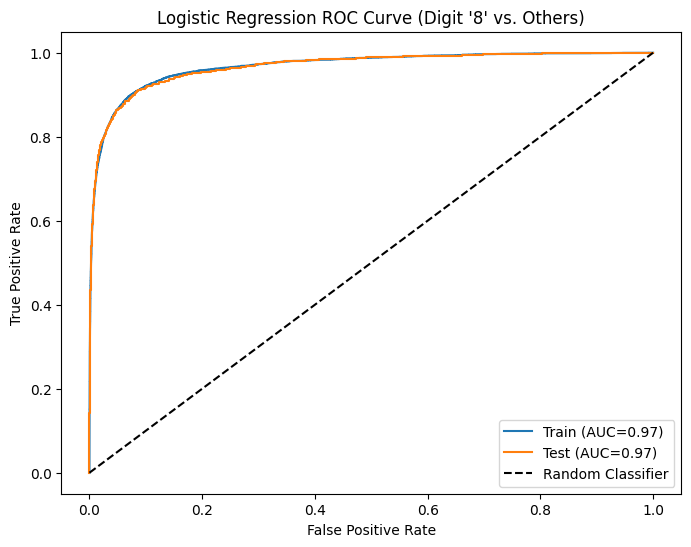

In [51]:
# Predict probabilities for AUC
train_proba_lr = log_reg.predict_proba(X_train)[:, 1]
test_proba_lr  = log_reg.predict_proba(X_test)[:, 1]

train_auc_lr = roc_auc_score(y_train, train_proba_lr)
test_auc_lr  = roc_auc_score(y_test,  test_proba_lr)

print("\n**Logistic Regression AUC**")
print("Training AUC:", train_auc_lr)
print("Testing AUC:",  test_auc_lr)

# Plot ROC (Train vs Test) separately for Logistic Regression
fpr_lr_train, tpr_lr_train, _ = roc_curve(y_train, train_proba_lr)
fpr_lr_test, tpr_lr_test, _   = roc_curve(y_test,  test_proba_lr)

plt.figure(figsize=(8, 6))
plt.plot(fpr_lr_train, tpr_lr_train, label=f"Train (AUC={train_auc_lr:.2f})")
plt.plot(fpr_lr_test,  tpr_lr_test,  label=f"Test (AUC={test_auc_lr:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random Classifier")
plt.title("Logistic Regression ROC Curve (Digit '8' vs. Others)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()


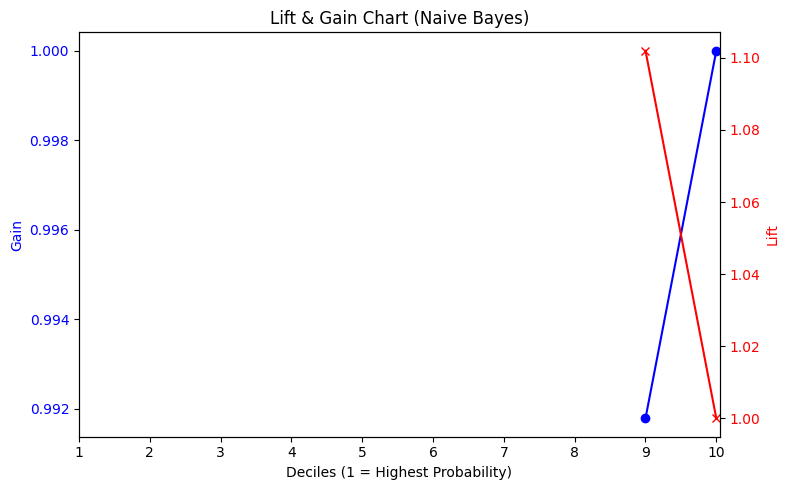

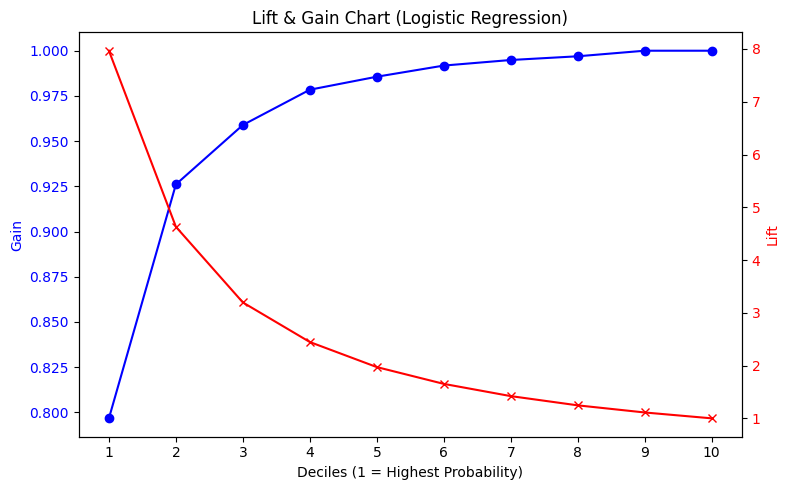

In [52]:
def plot_lift_gain_chart(model_name, y_true, y_proba, n_bins=10):
    """
    Generates a dual-axis Lift & Gain chart in n_bins deciles for a given model.
    We consider '8' as positive (1) and all others as negative (0).
    """
    # DataFrame with actuals and probabilities
    df = pd.DataFrame({
        'true_label': y_true,
        'pred_proba': y_proba
    })
    # Sort descending by probability
    df.sort_values('pred_proba', ascending=False, inplace=True)

    # Create deciles (top 10% = decile 1, etc.)
    df['decile'] = pd.qcut(df['pred_proba'], q=n_bins, labels=False, duplicates='drop')
    # Invert so decile 0 is highest probability range
    df['decile'] = n_bins - 1 - df['decile']

    grouped = df.groupby('decile')
    total_positives = df['true_label'].sum()  # total # of '8's
    lift_gain_data = []

    cum_positives = 0
    cum_count = 0

    for decile in sorted(grouped.groups.keys()):
        group_df = grouped.get_group(decile)
        positives_in_decile = group_df['true_label'].sum()
        count_in_decile     = len(group_df)

        cum_positives += positives_in_decile
        cum_count     += count_in_decile

        # Gain = fraction of total positives captured so far
        gain = cum_positives / total_positives if total_positives > 0 else 0

        # portion_of_data = fraction of total samples used up to this decile
        decile_index = decile + 1  # 1-based decile
        portion_of_data = decile_index / n_bins

        # Lift = Gain / portion_of_data
        lift = gain / portion_of_data if portion_of_data > 0 else 0

        lift_gain_data.append({
            'decile': decile_index,
            'gain': gain,
            'lift': lift
        })

    # Convert to DataFrame
    lift_gain_df = pd.DataFrame(lift_gain_data)

    # Plot dual-axis chart
    fig, ax1 = plt.subplots(figsize=(8, 5))
    ax1.set_title(f"Lift & Gain Chart ({model_name})")
    ax1.set_xlabel("Deciles (1 = Highest Probability)")

    # Gain on left y-axis
    ax1.set_ylabel("Gain", color='blue')
    ax1.plot(lift_gain_df['decile'], lift_gain_df['gain'], marker='o', color='blue', label='Gain')
    ax1.tick_params(axis='y', labelcolor='blue')

    # Lift on right y-axis
    ax2 = ax1.twinx()
    ax2.set_ylabel("Lift", color='red')
    ax2.plot(lift_gain_df['decile'], lift_gain_df['lift'], marker='x', color='red', label='Lift')
    ax2.tick_params(axis='y', labelcolor='red')

    plt.xticks(range(1, n_bins + 1))
    fig.tight_layout()
    plt.show()

# Plot for Naive Bayes
plot_lift_gain_chart("Naive Bayes", y_test, test_proba_nb, n_bins=10)

# Plot for Logistic Regression
plot_lift_gain_chart("Logistic Regression", y_test, test_proba_lr, n_bins=10)


**Naive Bayes (Generative Model)**

Naive Bayes, as a generative model, tries to learn the joint probability distribution
P(X,Y) and uses Bayes' theorem for classification. While this approach can work well for simpler datasets, like the Penguins dataset, it struggles with a more complex dataset like MNIST. The assumption of feature independence in Naive Bayes doesn’t align with the nature of MNIST data, where pixel values are often correlated. This leads to poor performance, with Naive Bayes achieving low accuracy (~31%), a poor AUC (~0.62) that’s close to random guessing, and weak prioritization of positive classes in the Lift and Gain charts. Naive Bayes is computationally efficient, but its reliance on overly simplistic assumptions makes it unsuitable for high-dimensional data like images.

**Logistic Regression (Discriminative Model)**

Logistic Regression, as a discriminative model, focuses directly on learning the decision boundary by estimating
P(Y∣X). It doesn’t rely on the assumptions about feature independence, which allows it to adapt better to complex datasets. Logistic Regression performs significantly better on MNIST, achieving high accuracy (96%) while balancing precision and recall effectively. Its AUC (0.97) demonstrates that it ranks probabilities confidently, and the Lift and Gain charts show that it prioritizes positive examples, like the digit ‘8,’ much more efficiently. The model’s ability to learn from feature correlations and directly optimize classification boundaries makes it a strong choice for complex tasks like this one.

**Generative vs. Discriminative Models**

Generative models like Naive Bayes work best for simpler datasets where the data distributions are easier to separate or fit the model's assumptions. However, discriminative models like Logistic Regression perform better on datasets like MNIST, where the focus needs to be on directly minimizing classification errors and handling overlapping classes effectively. While generative models are useful in specific contexts, discriminative models are the better choice for complex, high-dimensional datasets like MNIST. Logistic Regression’s performance here proves why discriminative approaches are preferred for real-world tasks like this one.